In [32]:
## Using Housing Price data the example

import pandas as pd
import numpy as np


housing = pd.read_csv('data/housing.csv')
housing.head()
print(housing.shape)
X = housing.drop('MEDV',axis=1).values
X = X.T
y = housing[['MEDV']].values
y = y.T
print('Shape of X:',X.shape)
print('Shape of y:',y.shape)

(489, 4)
Shape of X: (3, 489)
Shape of y: (1, 489)



### Architecture

**Let the neural network have a single input layer, two hidden layers (5 units and 4 units) and a single output layer with a single output unit.**

* Shape of Input Matrix : 3 into 489
* Shape of W1 matrix (Transfers information from input layer to first hidden layer) : 5 into 3
* Shape of B0 bias unit is 5 into 489
* Shape of W2 matrix (Transfers information from first hidden layer to second hidden layer) : 4 into 5
* Shape of B1 bias unit is 4 into 489
* Shape of W3 matrix (Transfers information from second hidden layer to output layer) : 1 into 4
* Shape of B2 bias Unit is 1 into 489

### Activations

* The hidden layers both have a tanh activation function to account for non-linearities in the data.
* The last layer, we do not use any activation as we do not want the output values to be restricted to the domain. [-1,1]

### Gradient Calculation and Weights Update

Taken from http://neuralnetworksanddeeplearning.com/chap2.html

![image](neural_net.png)




In [35]:
### Initialize Matrices
np.random.seed(42)
w1 = np.random.rand(5,3)
b0 = np.ones((5,489))
w2 = np.random.rand(4,5)
b1 = np.ones((4,489))
w3 = np.random.rand(1,4)
b2 = np.ones((1,489))

# Forward Pass
for i in range(100000):

    x1 = np.tanh(w1@X+b0)
    x2 = np.tanh(w2@x1+b1)
    x3 = w3@x2+b2
    if i%10000==0:
        print('Loss at Step ',i,' :')
        print(np.mean(np.power(x3-y,2)))
    ## Delta Calculation
    ## Assuming Loss function is MSE

    delta_3 = (x3-y)/480

    delta_2 = np.multiply(w3.T@delta_3,1-np.power(x2,2))

    delta_1 = np.multiply(w2.T@delta_2,1-np.power(x1,2))

    ## Weight Update
    ## Learning Rate
    alpha = 0.1

    w1 = w1 - (alpha*delta_1@X.T)
    b0 = b0 - (alpha*delta_1)
    w2 = w2 - (alpha*delta_2@x1.T)
    b1 = b1 - (alpha*delta_2)
    w3 = w3 - (alpha*delta_3@x2.T)
    b2 = b2 - (alpha*delta_3)




Loss at Step  0  :
233706392563.19678
Loss at Step  10000  :
422784858.052392
Loss at Step  20000  :
6551949.802495576
Loss at Step  30000  :
101536.38522481866
Loss at Step  40000  :
1573.52205607296
Loss at Step  50000  :
24.385068027517843
Loss at Step  60000  :
0.37789844791737276
Loss at Step  70000  :
0.005856339488777824
Loss at Step  80000  :
9.07564252927802e-05
Loss at Step  90000  :
1.4064637078591173e-06


### Checking Results
* Actual Results vs Estimated Results

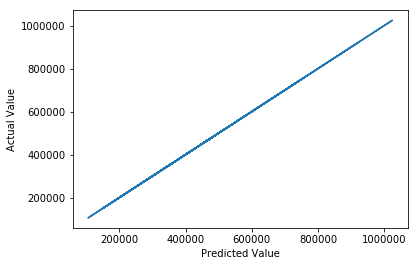

In [36]:
import matplotlib.pyplot as plt
plt.plot(x3.T,y.T)
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

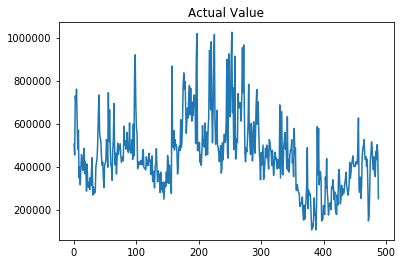

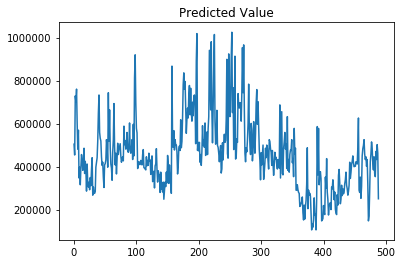

In [37]:
plt.plot(y.T)
plt.title('Actual Value')
plt.show()
plt.plot(x3.T)
plt.title('Predicted Value')
plt.show()

* Adjusted R squared value

In [38]:
SST = np.sum(np.power(y - np.mean(y),2))
SSE = np.sum(np.power(y - x3,2))
R_2 = 1 - (SSE/SST)
print(R_2)
adj_R_2 = 1 - ((1-R_2)*(489-1)/(489-3-1))
print('Adjusted R Squared',adj_R_2)

1.0
Adjusted R Squared 1.0


### Useful Resources

* https://math.stackexchange.com/questions/2323370/derivative-of-sigmoid-assuming-input-is-a-matrix
* https://sudeepraja.github.io/Neural/
* http://neuralnetworksanddeeplearning.com/chap2.html